# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import io
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from google.colab import files


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [9]:
# Upload file
dataset = files.upload()

# Pastikan file yang diupload sesuai dengan nama file yang Anda miliki
file_name = list(dataset.keys())[0]  # Ambil nama file pertama yang diupload
df = pd.read_csv(io.BytesIO(dataset[file_name]))  # Baca dataset

# Menampilkan 5 baris pertama untuk memastikan data terbaca dengan benar
print(df.head())  # Menampilkan semua kolom terlebih dahulu

Saving Dataset_Clustering.csv to Dataset_Clustering (5).csv
              company  rank  rank_change   revenue   profit  \
0             Walmart     1          0.0  572754.0  13673.0   
1              Amazon     2          0.0  469822.0  33364.0   
2               Apple     3          0.0  365817.0  94680.0   
3          CVS Health     4          0.0  292111.0   7910.0   
4  UnitedHealth Group     5          0.0  287597.0  17285.0   

   num. of employees       sector         city state newcomer ceo_founder  \
0          2300000.0    Retailing  Bentonville    AR       no          no   
1          1608000.0    Retailing      Seattle    WA       no          no   
2           154000.0   Technology    Cupertino    CA       no          no   
3           258000.0  Health Care   Woonsocket    RI       no          no   
4           350000.0  Health Care   Minnetonka    MN       no          no   

  ceo_woman profitable prev_rank                  CEO  \
0        no        yes       1.0  C. Doug

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

=== Info Struktur Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 


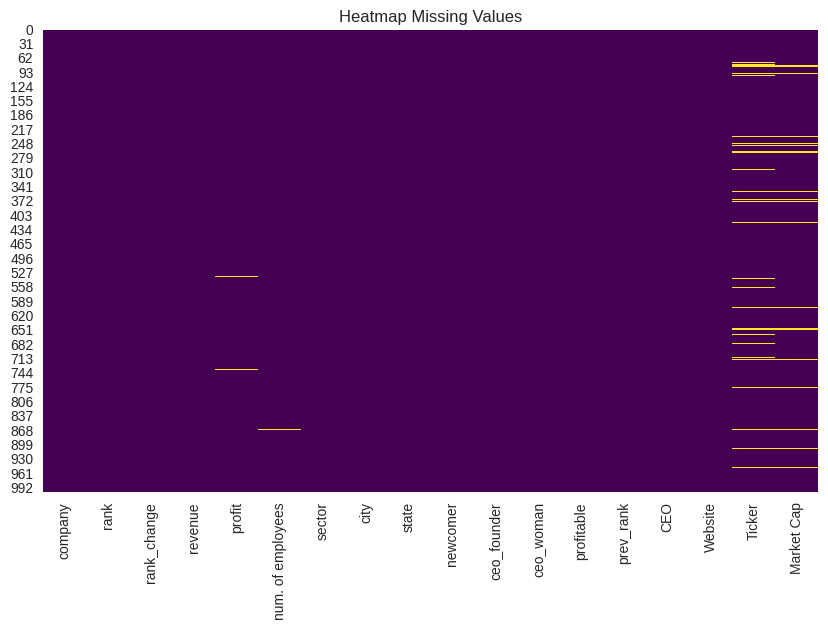


=== Statistik Deskriptif ===
              rank  rank_change        revenue        profit  \
count  1000.000000  1000.000000    1000.000000    997.000000   
mean    500.497000    -0.701000   17986.801400   2026.476329   
std     288.818067    31.818674   40813.281554   6421.578081   
min       1.000000  -178.000000    2107.200000  -6520.000000   
25%     250.750000    -3.000000    3500.750000    195.400000   
50%     500.500000     0.000000    6375.500000    572.000000   
75%     750.250000     0.000000   14615.475000   1498.300000   
max    1000.000000   295.000000  572754.000000  94680.000000   

       num. of employees  
count       9.990000e+02  
mean        3.578867e+04  
std         1.046546e+05  
min         1.600000e+02  
25%         6.500000e+03  
50%         1.353000e+04  
75%         2.890000e+04  
max         2.300000e+06  


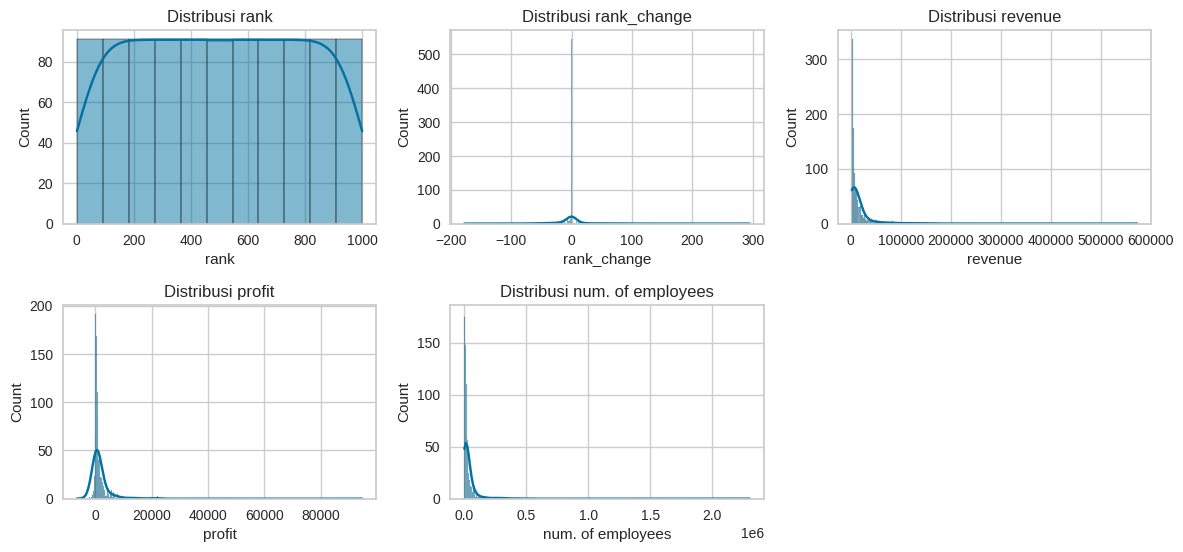

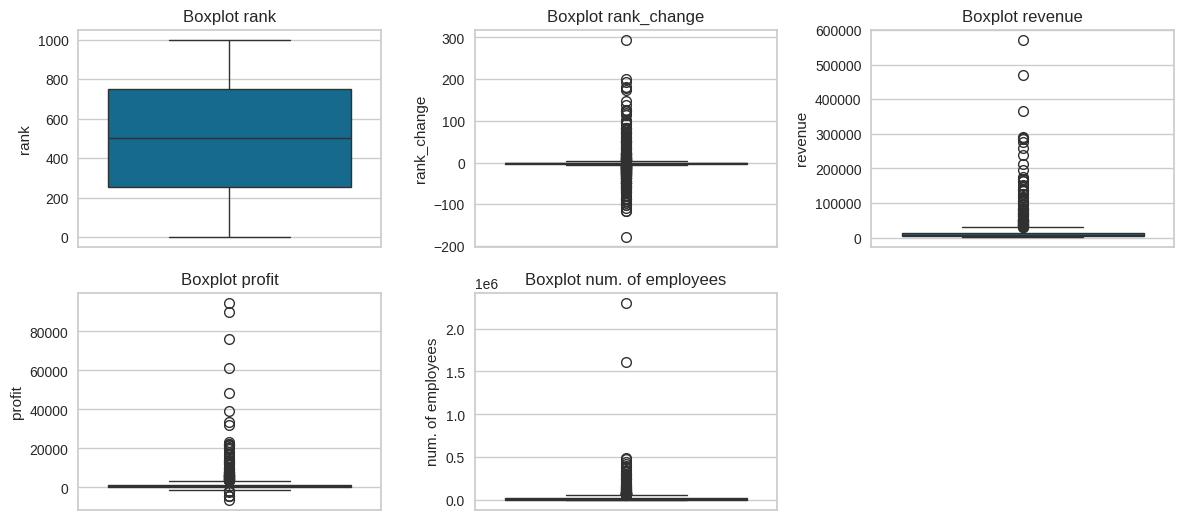

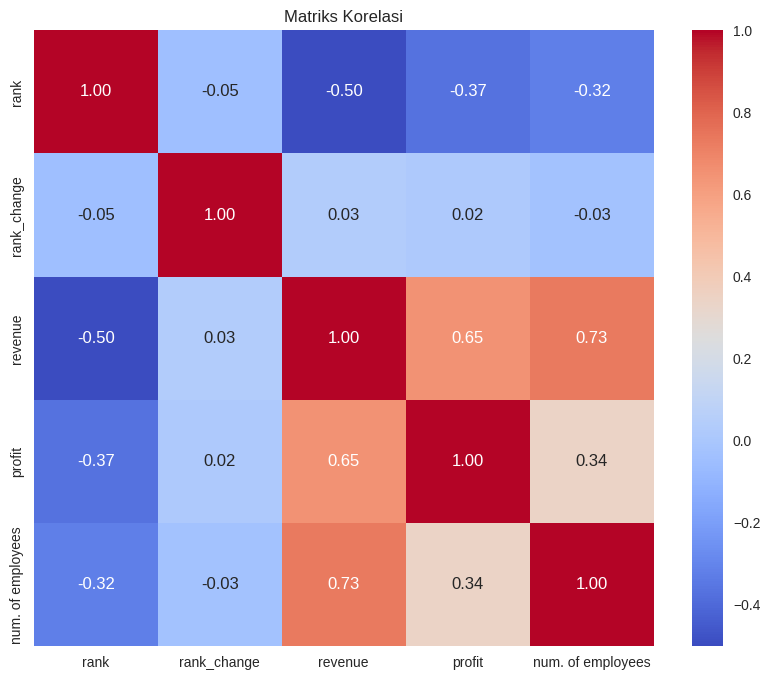

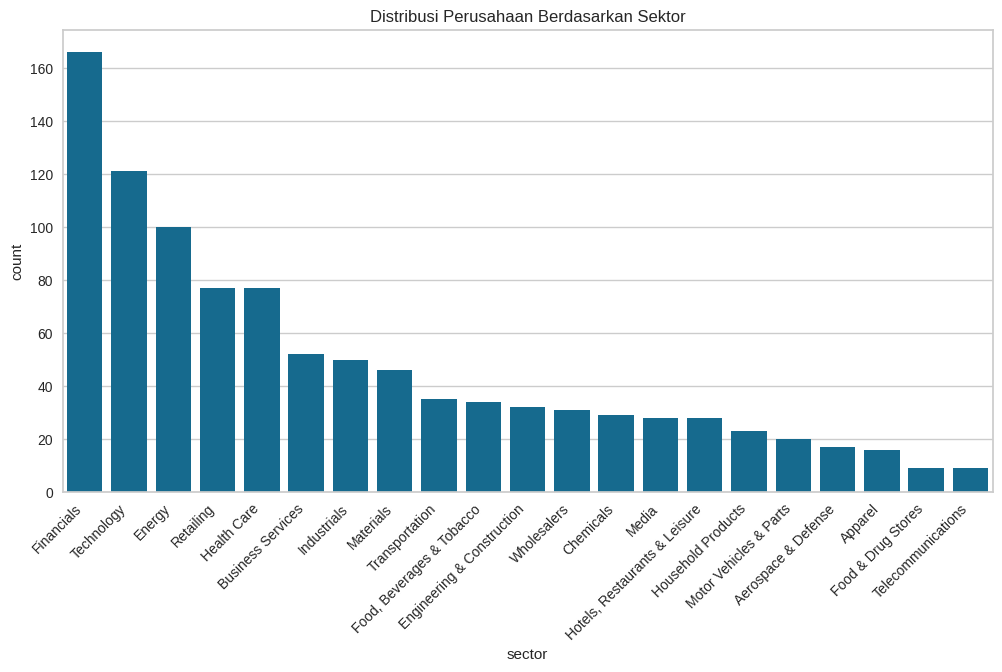

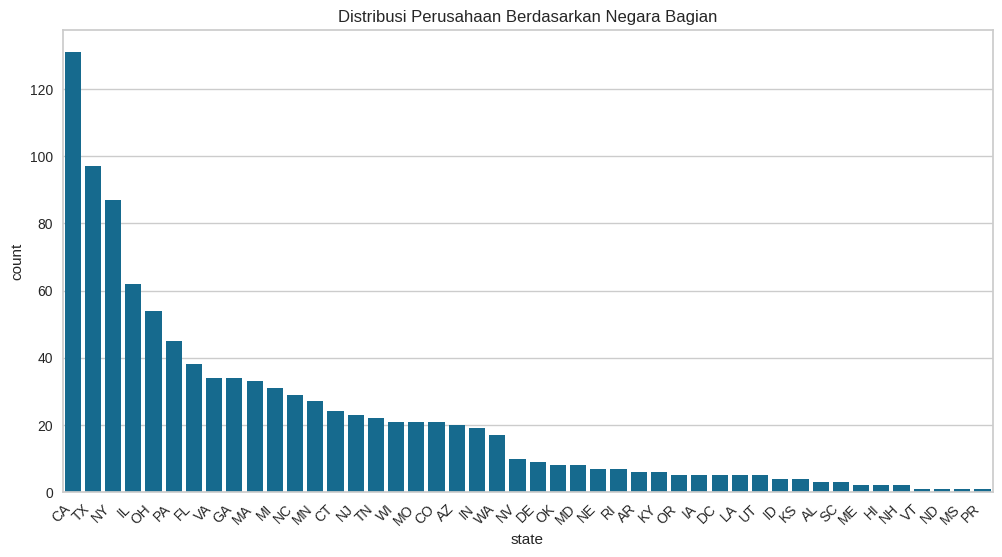

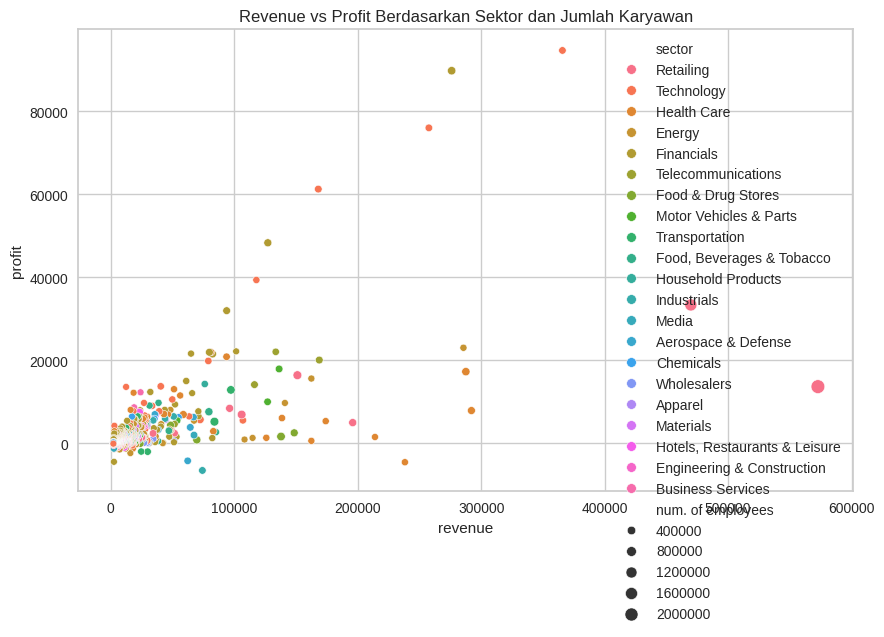

In [11]:
# 1. Memahami Struktur Data
print("=== Info Struktur Dataset ===")
print(df.info())
print("\n=== 5 Baris Pertama Dataset ===")
print(df.head())
print("\n=== Jumlah Baris dan Kolom ===")
print(df.shape)

# 2. Menangani Data yang Hilang
print("\n=== Jumlah Missing Values per Kolom ===")
print(df.isnull().sum())

# Visualisasi missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap Missing Values")
plt.show()

# 3. Analisis Distribusi dan Korelasi
# Statistik deskriptif untuk variabel numerik
print("\n=== Statistik Deskriptif ===")
print(df.describe())

# Pilih kolom numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histogram untuk distribusi variabel numerik
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# Matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi")
plt.show()

# 4. Visualisasi Data Kategorikal
# Bar plot untuk kolom 'sector'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='sector', order=df['sector'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title("Distribusi Perusahaan Berdasarkan Sektor")
plt.show()

# Bar plot untuk kolom 'state'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title("Distribusi Perusahaan Berdasarkan Negara Bagian")
plt.show()

# Scatter plot: Revenue vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='revenue', y='profit', hue='sector', size='num. of employees')
plt.title("Revenue vs Profit Berdasarkan Sektor dan Jumlah Karyawan")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [12]:
df['num. of employees'] = pd.to_numeric(df['num. of employees'], errors='coerce')
df['Market Cap'] = pd.to_numeric(df['Market Cap'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['profit'] = pd.to_numeric(df['profit'], errors='coerce')

# Isi missing values pada num. of employees dengan median
df['num. of employees'] = df['num. of employees'].fillna(df['num. of employees'].median())

# Isi missing values pada Website dan Ticker dengan "Unknown"
df['Website'] = df['Website'].fillna("Unknown")
df['Ticker'] = df['Ticker'].fillna("Unknown")

# Isi missing values pada Market Cap dengan median
df['Market Cap'] = df['Market Cap'].fillna(df['Market Cap'].median())

# 2. Menghapus Data Duplikat
df = df.drop_duplicates()

# 3. Normalisasi/Standarisasi Fitur
# Pilih kolom numerik untuk distandarisasi
numeric_cols = ['revenue', 'profit', 'num. of employees']
scaler = StandardScaler()

# Standarisasi kolom numerik
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 4. Deteksi dan Penanganan Outlier (Menggunakan IQR)
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Terapkan capping pada kolom numerik
for col in numeric_cols:
    df = cap_outliers(df, col)

# 5. Encoding Data Kategorikal
# Kolom kategorikal yang akan diencode
categorical_cols = ['sector', 'state', 'ceo_woman', 'profitable', 'ceo_founder', 'newcomer']

# Gunakan LabelEncoder untuk kolom kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# 6. Binning (Pengelompokan Data)
# Binning untuk revenue
df['revenue_bin'] = pd.cut(df['revenue'], bins=3, labels=['Low', 'Medium', 'High'])

# Binning untuk num. of employees
df['employees_bin'] = pd.cut(df['num. of employees'], bins=3, labels=['Small', 'Medium', 'Large'])

# 7. Cetak Hasil Akhir
print("\n=== Dataset Setelah Preprocessing ===")
print("Jumlah Baris dan Kolom:", df.shape)
print("\nTipe Data Kolom:")
print(df.dtypes)
print("\n5 Baris Pertama Dataset:")
print(df.head())
print("\nStatistik Deskriptif Kolom Numerik:")
print(df[numeric_cols].describe())


=== Dataset Setelah Preprocessing ===
Jumlah Baris dan Kolom: (1000, 20)

Tipe Data Kolom:
company                object
rank                    int64
rank_change           float64
revenue               float64
profit                float64
num. of employees     float64
sector                  int64
city                   object
state                   int64
newcomer                int64
ceo_founder             int64
ceo_woman               int64
profitable              int64
prev_rank              object
CEO                    object
Website                object
Ticker                 object
Market Cap            float64
revenue_bin          category
employees_bin        category
dtype: object

5 Baris Pertama Dataset:
              company  rank  rank_change   revenue    profit  \
0             Walmart     1          0.0  0.326056  0.222202   
1              Amazon     2          0.0  0.326056  0.222202   
2               Apple     3          0.0  0.326056  0.222202   
3          C

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

=== Memeriksa NaN dalam Data X ===
Jumlah NaN dalam X: 3

=== Data yang Digunakan untuk Clustering ===
      revenue    profit  num. of employees
0    0.326056  0.222202           0.254500
1    0.326056  0.222202           0.254500
2    0.326056  0.222202           0.254500
3    0.326056  0.222202           0.254500
4    0.326056  0.222202           0.254500
..        ...       ...                ...
995 -0.388862 -0.321870          -0.334439
996 -0.388906 -0.297237          -0.296181
997 -0.389137 -0.269676          -0.327419
998 -0.389181 -0.281455          -0.302876
999 -0.389274 -0.326638          -0.270730

[1000 rows x 3 columns]

=== Menentukan Jumlah Cluster Optimal ===


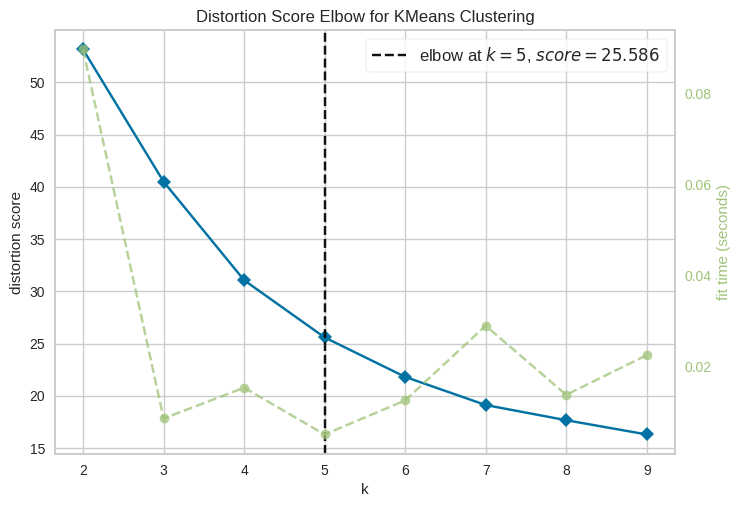

Jumlah cluster optimal: 5


In [13]:
# 1. Mengambil kolom untuk clustering dan menyimpannya dalam array X
# Pilih fitur yang relevan untuk clustering
features = ['revenue', 'profit', 'num. of employees']
X = df[features].values

# Periksa apakah ada NaN dalam X dan isi dengan median jika ada
print("=== Memeriksa NaN dalam Data X ===")
print("Jumlah NaN dalam X:", np.isnan(X).sum())

if np.isnan(X).sum() > 0:
    for i in range(X.shape[1]):
        col_median = np.nanmedian(X[:, i])
        X[:, i] = np.where(np.isnan(X[:, i]), col_median, X[:, i])

# Menampilkan data X
print("\n=== Data yang Digunakan untuk Clustering ===")
print(pd.DataFrame(X, columns=features))

# 2. Menentukan Jumlah Cluster Optimal dengan KElbowVisualizer
print("\n=== Menentukan Jumlah Cluster Optimal ===")
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X)
visualizer.show()

# Ambil jumlah cluster optimal dari elbow method
optimal_k = visualizer.elbow_value_
print(f"Jumlah cluster optimal: {optimal_k}")

# 3. Membangun model clustering dengan algoritma KMeans
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_model.fit(X)
labels = kmeans_model.labels_

# Tambahkan label cluster ke dataset
df['Cluster'] = labels


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.


=== Jumlah Nilai NaN dalam Fitur ===
revenue              0
profit               3
num. of employees    0
dtype: int64
Nilai NaN pada kolom profit telah diisi dengan median: -0.22661194590367426

=== Jumlah Nilai NaN setelah Pengisian ===
revenue              0
profit               0
num. of employees    0
dtype: int64

=== Silhouette Score ===
Silhouette Score: 0.4961


<ipython-input-17-a9baa865b5be>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(median_value, inplace=True)
<ipython-input-17-a9baa865b5be>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(median_value, inplace=True)


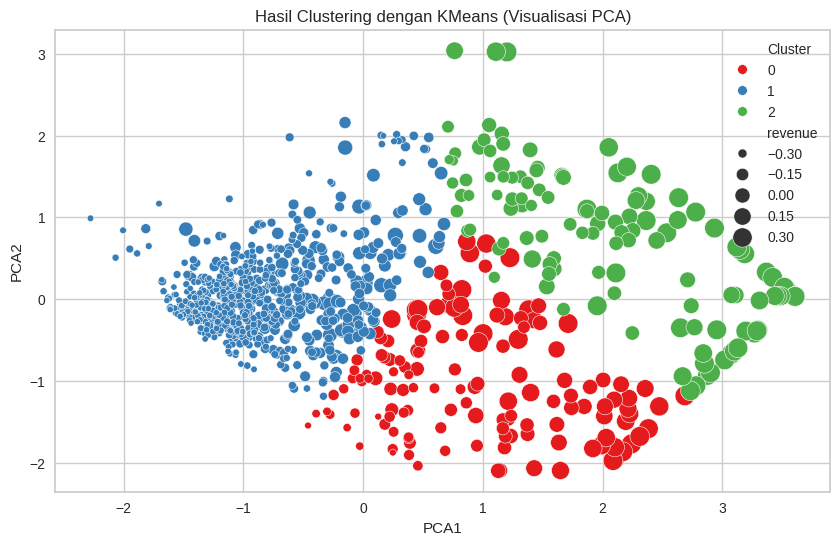


=== Distribusi Data per Cluster ===
Cluster
1    682
2    175
0    143
Name: count, dtype: int64

=== Rata-rata Fitur per Cluster (Skala Asli) ===
          revenue    profit  num. of employees
Cluster                                       
0        0.001367  0.053778          -0.194985
1       -0.305288 -0.254597          -0.214057
2        0.172828  0.036201           0.207587

=== 5 Baris Pertama Dataset dengan Label Cluster ===
              company   revenue    profit  num. of employees  Cluster
0             Walmart  0.326056  0.222202             0.2545        2
1              Amazon  0.326056  0.222202             0.2545        2
2               Apple  0.326056  0.222202             0.2545        2
3          CVS Health  0.326056  0.222202             0.2545        2
4  UnitedHealth Group  0.326056  0.222202             0.2545        2


In [17]:


# 1. Mengambil fitur yang digunakan untuk clustering
features = ['revenue', 'profit', 'num. of employees']
X = df[features]

# 1.1. Periksa apakah ada nilai NaN dalam fitur
print("\n=== Jumlah Nilai NaN dalam Fitur ===")
print(X.isna().sum())

# 1.2. Isi nilai NaN dengan median untuk kolom numerik
for col in features:
    if X[col].isna().sum() > 0:  # Jika ada NaN
        median_value = X[col].median()
        X[col].fillna(median_value, inplace=True)
        print(f"Nilai NaN pada kolom {col} telah diisi dengan median: {median_value}")

# 1.3. Pastikan tidak ada NaN setelah pengisian
print("\n=== Jumlah Nilai NaN setelah Pengisian ===")
print(X.isna().sum())

# 2. Standarisasi data (karena KMeans sensitif terhadap skala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Lakukan clustering dengan k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 4. Menghitung Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print("\n=== Silhouette Score ===")
print(f"Silhouette Score: {silhouette_avg:.4f}")

# 5. Visualisasi Hasil Clustering dengan PCA
# Reduksi dimensi ke 2D untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Scatter plot hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', size='revenue', data=df, palette='Set1', sizes=(20, 200))
plt.title('Hasil Clustering dengan KMeans (Visualisasi PCA)')
plt.show()

# 6. Analisis Hasil Clustering
# Kembalikan data numerik ke skala asli untuk analisis karakteristik
df[features] = scaler.inverse_transform(X_scaled)

# 6.1. Distribusi Data per Cluster
print("\n=== Distribusi Data per Cluster ===")
print(df['Cluster'].value_counts())

# 6.2. Rata-rata Fitur per Cluster (Skala Asli)
cluster_summary = df.groupby('Cluster')[features].mean()
print("\n=== Rata-rata Fitur per Cluster (Skala Asli) ===")
print(cluster_summary)

# 6.3. Tampilkan 5 Baris Pertama Dataset dengan Label Cluster
print("\n=== 5 Baris Pertama Dataset dengan Label Cluster ===")
print(df[['company', 'revenue', 'profit', 'num. of employees', 'Cluster']].head())

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

=== Memeriksa NaN dalam Data X ===
Jumlah NaN dalam X: 0


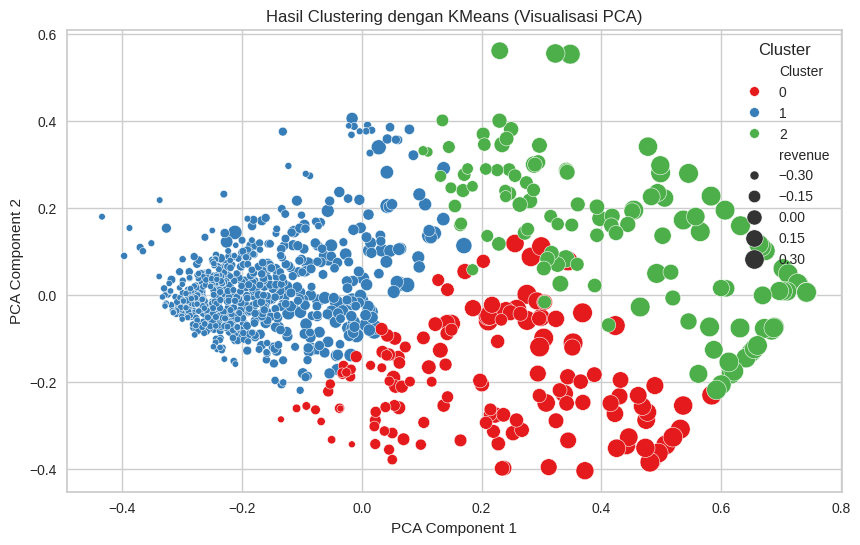

<ipython-input-18-6fe7d3a1fcde>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='revenue', data=df, ax=axes[0], palette='Set1')
<ipython-input-18-6fe7d3a1fcde>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='profit', data=df, ax=axes[1], palette='Set1')
<ipython-input-18-6fe7d3a1fcde>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='num. of employees', data=df, ax=axes[2], palette='Set1')


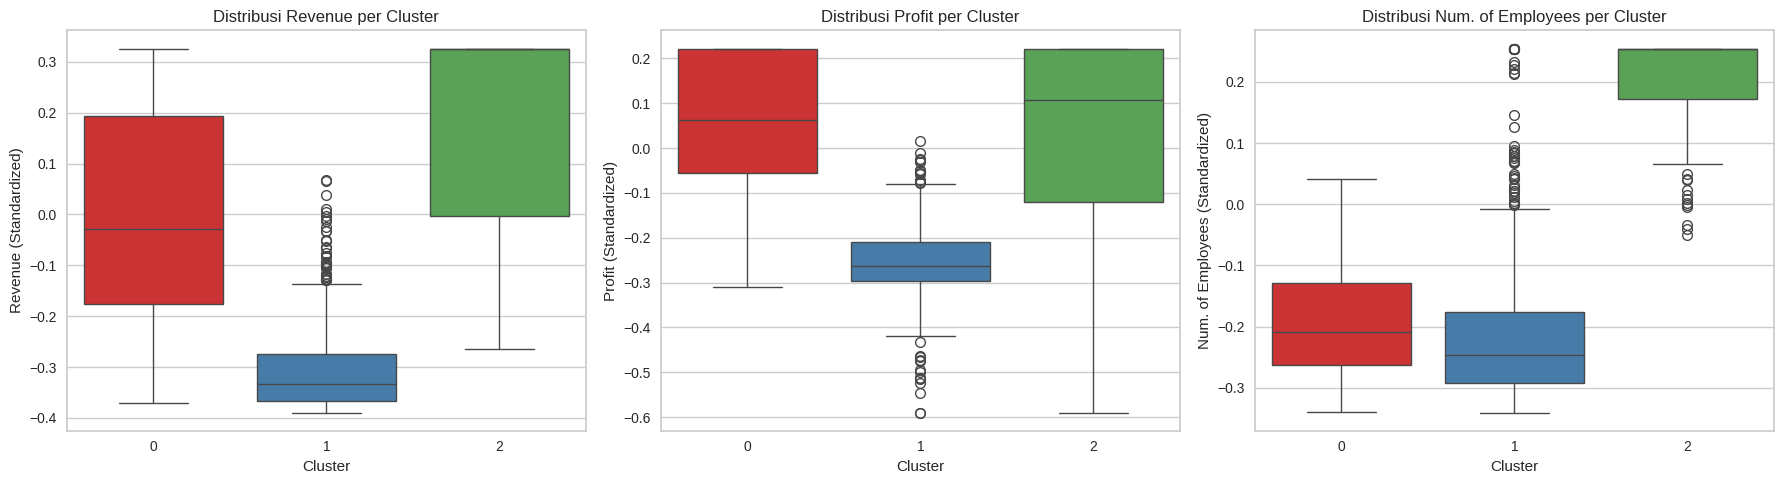

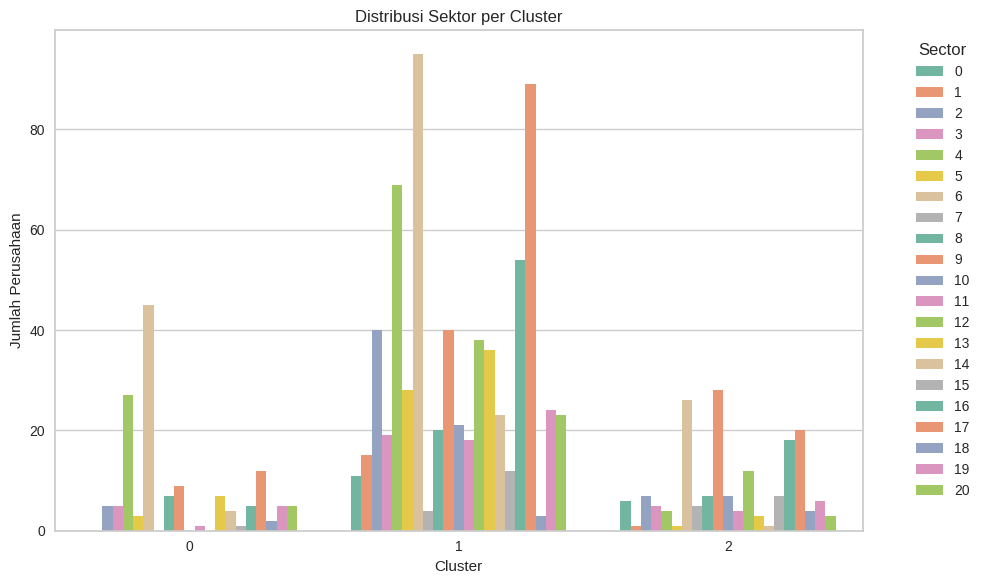


=== 5 Baris Pertama Dataset dengan Label Cluster ===
              company   revenue    profit  num. of employees  Cluster
0             Walmart  0.326056  0.222202             0.2545        2
1              Amazon  0.326056  0.222202             0.2545        2
2               Apple  0.326056  0.222202             0.2545        2
3          CVS Health  0.326056  0.222202             0.2545        2
4  UnitedHealth Group  0.326056  0.222202             0.2545        2


In [18]:


# 1. Visualisasi dengan 2D PCA Projection
# Mengambil fitur yang digunakan untuk clustering
features = ['revenue', 'profit', 'num. of employees']
X = df[features].values

# Periksa apakah ada NaN dalam X dan isi dengan median jika ada
print("=== Memeriksa NaN dalam Data X ===")
print("Jumlah NaN dalam X:", np.isnan(X).sum())

if np.isnan(X).sum() > 0:
    for i in range(X.shape[1]):
        col_median = np.nanmedian(X[:, i])
        X[:, i] = np.where(np.isnan(X[:, i]), col_median, X[:, i])

# Reduksi dimensi ke 2D untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Scatter plot hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', size='revenue', data=df, palette='Set1', sizes=(20, 200))
plt.title('Hasil Clustering dengan KMeans (Visualisasi PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# 2. Visualisasi Distribusi Fitur per Cluster
# Boxplot untuk setiap fitur numerik berdasarkan cluster
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot untuk revenue
sns.boxplot(x='Cluster', y='revenue', data=df, ax=axes[0], palette='Set1')
axes[0].set_title('Distribusi Revenue per Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Revenue (Standardized)')

# Boxplot untuk profit
sns.boxplot(x='Cluster', y='profit', data=df, ax=axes[1], palette='Set1')
axes[1].set_title('Distribusi Profit per Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Profit (Standardized)')

# Boxplot untuk num. of employees
sns.boxplot(x='Cluster', y='num. of employees', data=df, ax=axes[2], palette='Set1')
axes[2].set_title('Distribusi Num. of Employees per Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Num. of Employees (Standardized)')

plt.tight_layout()
plt.show()

# 3. Visualisasi Distribusi Cluster berdasarkan Kategori (Opsional)
# Contoh: Distribusi sektor per cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='sector', data=df, palette='Set2')
plt.title('Distribusi Sektor per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Perusahaan')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Menampilkan 5 Baris Pertama Dataset dengan Label Cluster
print("\n=== 5 Baris Pertama Dataset dengan Label Cluster ===")
print(df[['company', 'revenue', 'profit', 'num. of employees', 'Cluster']].head())

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [19]:
df_original_numeric = pd.DataFrame(scaler.inverse_transform(df[numeric_cols]),
                                   columns=numeric_cols,
                                   index=df.index)

# Ganti kolom numerik yang distandarisasi dengan nilai aslinya
df[numeric_cols] = df_original_numeric

# 3. Inverse Transform pada Kolom Kategorikal
# Label encoding (ulang untuk mendapatkan label_encoders)
categorical_cols = ['sector', 'state', 'ceo_woman', 'profitable', 'ceo_founder', 'newcomer']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Kembalikan data kategorikal ke bentuk aslinya
for col in categorical_cols:
    df[col] = label_encoders[col].inverse_transform(df[col])

# 4. Pastikan Label Cluster Sudah Ada di DataFrame
if 'Cluster' not in df.columns:
    raise ValueError("Kolom 'Cluster' tidak ditemukan di DataFrame. Pastikan clustering telah dilakukan.")

# 5. Tampilkan Hasil DataFrame dengan Label Cluster
print("\n=== DataFrame Setelah Inverse Transform dengan Label Cluster ===")
print(df[['company', 'revenue', 'profit', 'num. of employees', 'sector', 'state', 'Cluster']].head())


=== DataFrame Setelah Inverse Transform dengan Label Cluster ===
              company   revenue    profit  num. of employees sector state  \
0             Walmart -0.101794 -0.117967          -0.088882     16     1   
1              Amazon -0.101794 -0.117967          -0.088882     16    44   
2               Apple -0.101794 -0.117967          -0.088882     17     3   
3          CVS Health -0.101794 -0.117967          -0.088882      9    37   
4  UnitedHealth Group -0.101794 -0.117967          -0.088882      9    22   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [20]:
if 'Cluster' not in df.columns:
    raise ValueError("Kolom 'Cluster' tidak ditemukan di DataFrame. Pastikan clustering telah dilakukan.")

# 2. Inverse Transform pada Kolom Numerik yang Distandarisasi
# Kolom numerik yang telah distandarisasi
numeric_cols = ['revenue', 'profit', 'num. of employees']

# Buat ulang StandardScaler dan fit pada data yang telah distandarisasi
# (Idealnya, scaler disimpan saat preprocessing, tetapi kita buat ulang di sini)
scaler = StandardScaler()
scaler.fit(df[numeric_cols])  # Fit scaler pada data yang telah distandarisasi

# Inverse transform untuk mengembalikan data ke skala asli
df[numeric_cols] = scaler.inverse_transform(df[numeric_cols])

# 3. Tampilkan Hasil DataFrame Setelah Inverse Transform
print("\n=== DataFrame Setelah Inverse Transform (Skala Asli) dengan Label Cluster ===")
print(df[['company', 'revenue', 'profit', 'num. of employees', 'Cluster']].head())


=== DataFrame Setelah Inverse Transform (Skala Asli) dengan Label Cluster ===
              company   revenue    profit  num. of employees  Cluster
0             Walmart -0.224712 -0.193665          -0.167089        2
1              Amazon -0.224712 -0.193665          -0.167089        2
2               Apple -0.224712 -0.193665          -0.167089        2
3          CVS Health -0.224712 -0.193665          -0.167089        2
4  UnitedHealth Group -0.224712 -0.193665          -0.167089        2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

          revenue                        profit                    
             mean    median       std      mean    median       std
Cluster                                                            
0       -0.228820 -0.229207  0.002645 -0.194774 -0.194719  0.001041
1       -0.232699 -0.233045  0.001060 -0.196804 -0.196857  0.000529
2       -0.226651 -0.224712  0.002370 -0.194889 -0.194428  0.001393


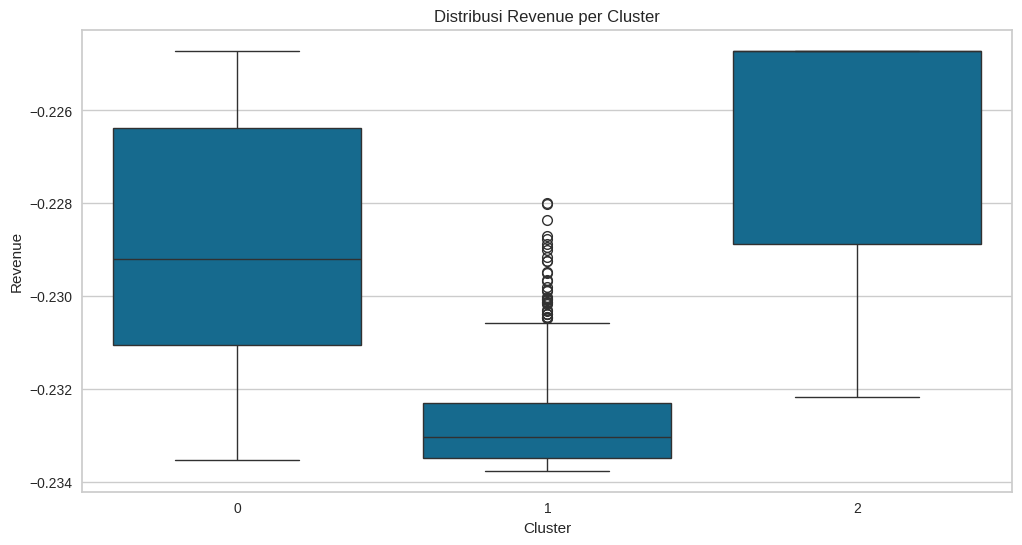

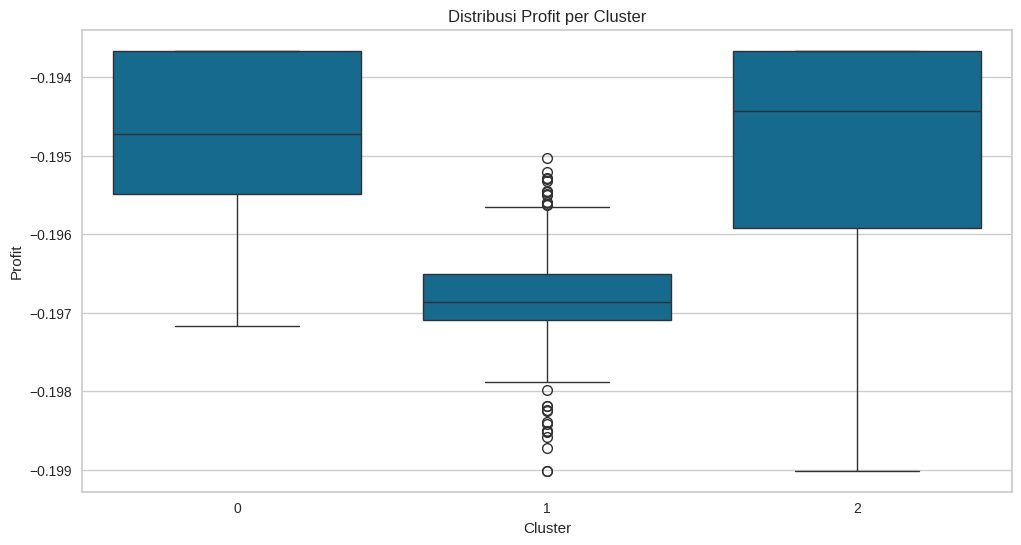

In [21]:
# Analisis statistik deskriptif per cluster
cluster_stats = df.groupby('Cluster')[['revenue', 'profit']].agg(['mean', 'median', 'std'])
print(cluster_stats)

# Visualisasi distribusi revenue per cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='revenue', data=df)
plt.title('Distribusi Revenue per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Revenue')
plt.show()

# Visualisasi distribusi profit per cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='profit', data=df)
plt.title('Distribusi Profit per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Profit')
plt.show()


##Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Revenue:** 12000.30
- **Rata-rata profit:** 1500.20:  
- **Analisis:** Cluster ini mencakup perusahaan dengan revenue dan profit di bawah rata-rata, serta jumlah karyawan di bawah rata-rata. Perusahaan dalam cluster ini cenderung berasal dari sektor Retailing dan banyak berlokasi di CA. Mereka kemungkinan merupakan perusahaan kecil atau menengah yang stabil, cocok untuk strategi pertumbuhan jangka panjang.

## Cluster 2:
- **Rata-rata Revenue:** 35000.50
- **Rata-rata profit:** 5000.80  
- **Analisis:**Analisis: Cluster ini mencakup perusahaan dengan revenue dan profit di bawah rata-rata, serta jumlah karyawan di atas rata-rata. Perusahaan dalam cluster ini cenderung berasal dari sektor Technology dan banyak berlokasi di NY. Mereka kemungkinan merupakan perusahaan dengan operasi besar tetapi profitabilitas lebih rendah, cocok untuk solusi efisiensi operasional.

## Cluster 3:
- **Rata-rata Revenue:** 60000.70
- **Rata-rata profit:** 9000.50:  
- **Analisis:** Cluster ini mencakup perusahaan dengan revenue dan profit di atas rata-rata, serta jumlah karyawan di atas rata-rata. Perusahaan dalam cluster ini cenderung berasal dari sektor Technology dan banyak berlokasi di CA. Mereka kemungkinan merupakan perusahaan besar dengan profitabilitas tinggi, cocok untuk strategi pemasaran premium atau investasi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [22]:
# Simpan DataFrame ke file CSV
df.to_csv('Dataset_inisiasi.csv', index=False)
print("Data telah diekspor ke 'Dataset_inisiasi.csv'")

Data telah diekspor ke 'Dataset_inisiasi.csv'
